In [1]:
from rpy2.robjects.packages import importr
import matplotlib.pyplot as plt
import numpy as np
import perceptron
mlbench = importr('mlbench')

In [2]:
xor = mlbench.mlbench_xor(100)
twod = mlbench.mlbench_2dnormals(100)
circles = mlbench.mlbench_circle(100)
spirals = mlbench.mlbench_spirals(100, sd=0.05)

<IPython.core.display.Javascript object>


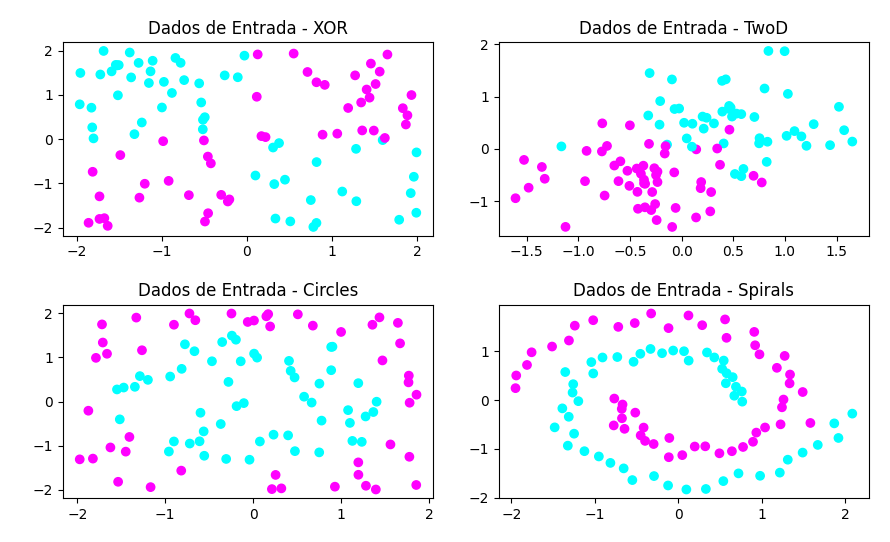

In [3]:
%matplotlib notebook
xor_data, xor_class = np.array(xor[0])*2, np.array(xor[1])
twod_data,twod_class = np.array(twod[0])/2, np.array(twod[1])
circles_data, circles_class = np.array(circles[0])*2, np.array(circles[1])
spirals_data, spirals_class = np.array(spirals[0])*2, np.array(spirals[1])

f, (ax) = plt.subplots(2,2)

ax[0, 0].set_title('Dados de Entrada - XOR')
ax[0, 0].scatter(xor_data[:, 0], xor_data[:,1], c = xor_class, cmap = 'cool')

ax[0, 1].set_title('Dados de Entrada - TwoD')
ax[0, 1].scatter(twod_data[:, 0], twod_data[:,1], c = twod_class, cmap = 'cool')

ax[1, 0].set_title('Dados de Entrada - Circles')
ax[1, 0].scatter(circles_data[:, 0], circles_data[:,1], c = circles_class, cmap = 'cool')

ax[1, 1].set_title('Dados de Entrada - Spirals')
ax[1, 1].scatter(spirals_data[:, 0], spirals_data[:,1], c = spirals_class, cmap = 'cool')
f.tight_layout()
plt.show()

In [4]:
def ELM_train(X_data, Y_data, num_neuronios):
    p = num_neuronios
    X = X_data
    Y = np.where(Y_data == 2, -1, 1)
    n = X.shape[1]
    Z = np.random.uniform(low = -0.5, high = 0.5, size = (n+1, p))
    Xaug = np.append(X, np.ones((X.shape[0], 1)), 1)
    H = np.tanh(np.matmul(Xaug, Z))
    W = np.matmul(np.linalg.pinv(H), Y)
    return W, H, Z

In [5]:
def ELM_y(X_data, W, Z):
    X = X_data
    Xaug_t = np.append(X, np.ones((X.shape[0], 1)), 1)
    H_t = np.tanh(np.matmul(Xaug_t, Z))
    Y_hat = np.matmul(H_t, W)
    return np.where(Y_hat < 0, 1, -1)

In [6]:
x1_lin = np.linspace(-2.1, 2.1, 200)
x2_lin = np.linspace(-2.1, 2.1, 200)
X1, X2 = np.meshgrid(x1_lin, x2_lin)
X_lin = np.column_stack((X1.ravel(),X2.ravel()))

In [17]:
num_layers = 1

W_xor, H_xor, Z_xor = ELM_train(xor_data, xor_class, num_layers)
Y_xor = ELM_y(X_lin, W_xor, Z_xor)

W_twod, H_twod, Z_twod = ELM_train(twod_data, twod_class, num_layers)
Y_twod = ELM_y(X_lin, W_twod, Z_twod)

W_circles, H_circles, Z_circles = ELM_train(circles_data, circles_class, num_layers)
Y_circles = ELM_y(X_lin, W_circles, Z_circles)

W_spirals, H_spirals, Z_spirals = ELM_train(spirals_data, spirals_class, num_layers)
Y_spirals = ELM_y(X_lin, W_spirals, Z_spirals)

<IPython.core.display.Javascript object>


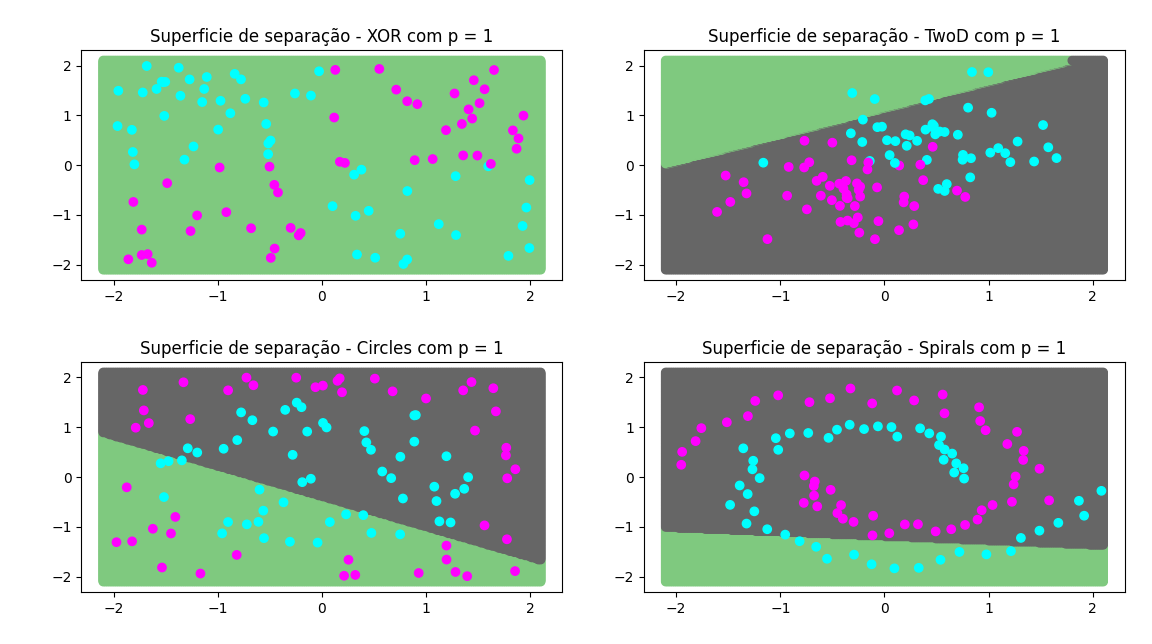

In [18]:
%matplotlib notebook
f, (ax) = plt.subplots(2,2)
ax[0, 0].scatter(X_lin[:, 0], X_lin[:,1], c = Y_xor, cmap = 'Accent')
ax[0, 1].scatter(X_lin[:, 0], X_lin[:,1], c = Y_twod, cmap = 'Accent')
ax[1,0].scatter(X_lin[:, 0], X_lin[:,1], c = Y_circles, cmap = 'Accent')
ax[1,1].scatter(X_lin[:, 0], X_lin[:,1], c = Y_spirals, cmap = 'Accent')

ax[0, 0].set_title(f'Superficie de separação - XOR com p = {num_layers}')
ax[0, 1].set_title(f'Superficie de separação - TwoD com p = {num_layers}')
ax[1, 0].set_title(f'Superficie de separação - Circles com p = {num_layers}')
ax[1, 1].set_title(f'Superficie de separação - Spirals com p = {num_layers}')

ax[0, 0].scatter(xor_data[:, 0], xor_data[:,1], c = xor_class, cmap = 'cool')
ax[0, 1].scatter(twod_data[:, 0], twod_data[:,1], c = twod_class, cmap = 'cool')
ax[1,0].scatter(circles_data[:, 0], circles_data[:,1], c = circles_class, cmap = 'cool')
ax[1,1].scatter(spirals_data[:, 0], spirals_data[:,1], c = spirals_class, cmap = 'cool')

f.tight_layout()
plt.show()